This data is from a cardiovascular study carried ou ton town of Framingham, Massachusetts. The dataset provides details of information of patients on different attributes such as sex of the patient, age, heart rate, behavioral habits etc. and whether the patient has future risk of coronary heart disease. The goal of this project is to predict whether the patient has risk of heart disease using the given dataset.

Data Preparation

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv("framingham.csv")
ds

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [3]:
ds.shape

(4238, 16)

Checking number of rows and columns

In [4]:
ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:

dict = {}
for i in list(ds.columns):
    dict[i] = ds[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
male,2
age,39
education,4
currentSmoker,2
cigsPerDay,33
BPMeds,2
prevalentStroke,2
prevalentHyp,2
diabetes,2
totChol,248


Identifying column and their data types

In [6]:
print("The categorial cols are : ", ['male', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD'])
print("The continuous cols are : ", ['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'])
print("The target variable is :  ", 'TenYearCHD')

The categorial cols are :  ['male', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
The continuous cols are :  ['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
The target variable is :   TenYearCHD


In [7]:
categorical_cols = ['male', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']
continuous_cols = ['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [8]:
ds.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Checking null values

In [9]:
count=0
for i in ds.isnull().sum(axis=1):
    if i>0:
        count=count+1
per = round((count/(len(ds.index))) * 100)
print('Null value percentage:', per )

Null value percentage: 14


Checking null value percentage

In [10]:
ds.dropna(axis=0, inplace=True)

Since only 14 percent of the total data is null, rows with null values are dropped.

In [11]:
ds

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [12]:
ds.duplicated().sum()

0

Checking number of duplicated values. There are no duplicates in dataset.

In [13]:
ds.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Summary stats of all columns

In [14]:
ds[continuous_cols].describe()

,age,education,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,49.557440,1.979759,9.022155,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127
std,8.561133,1.022657,11.918869,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128
min,32.000000,1.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,1.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000
50%,49.000000,2.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000
75%,56.000000,3.000000,20.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000
max,70.000000,4.000000,70.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000


Summary stats for columns with continuous values

# Univariate analysis

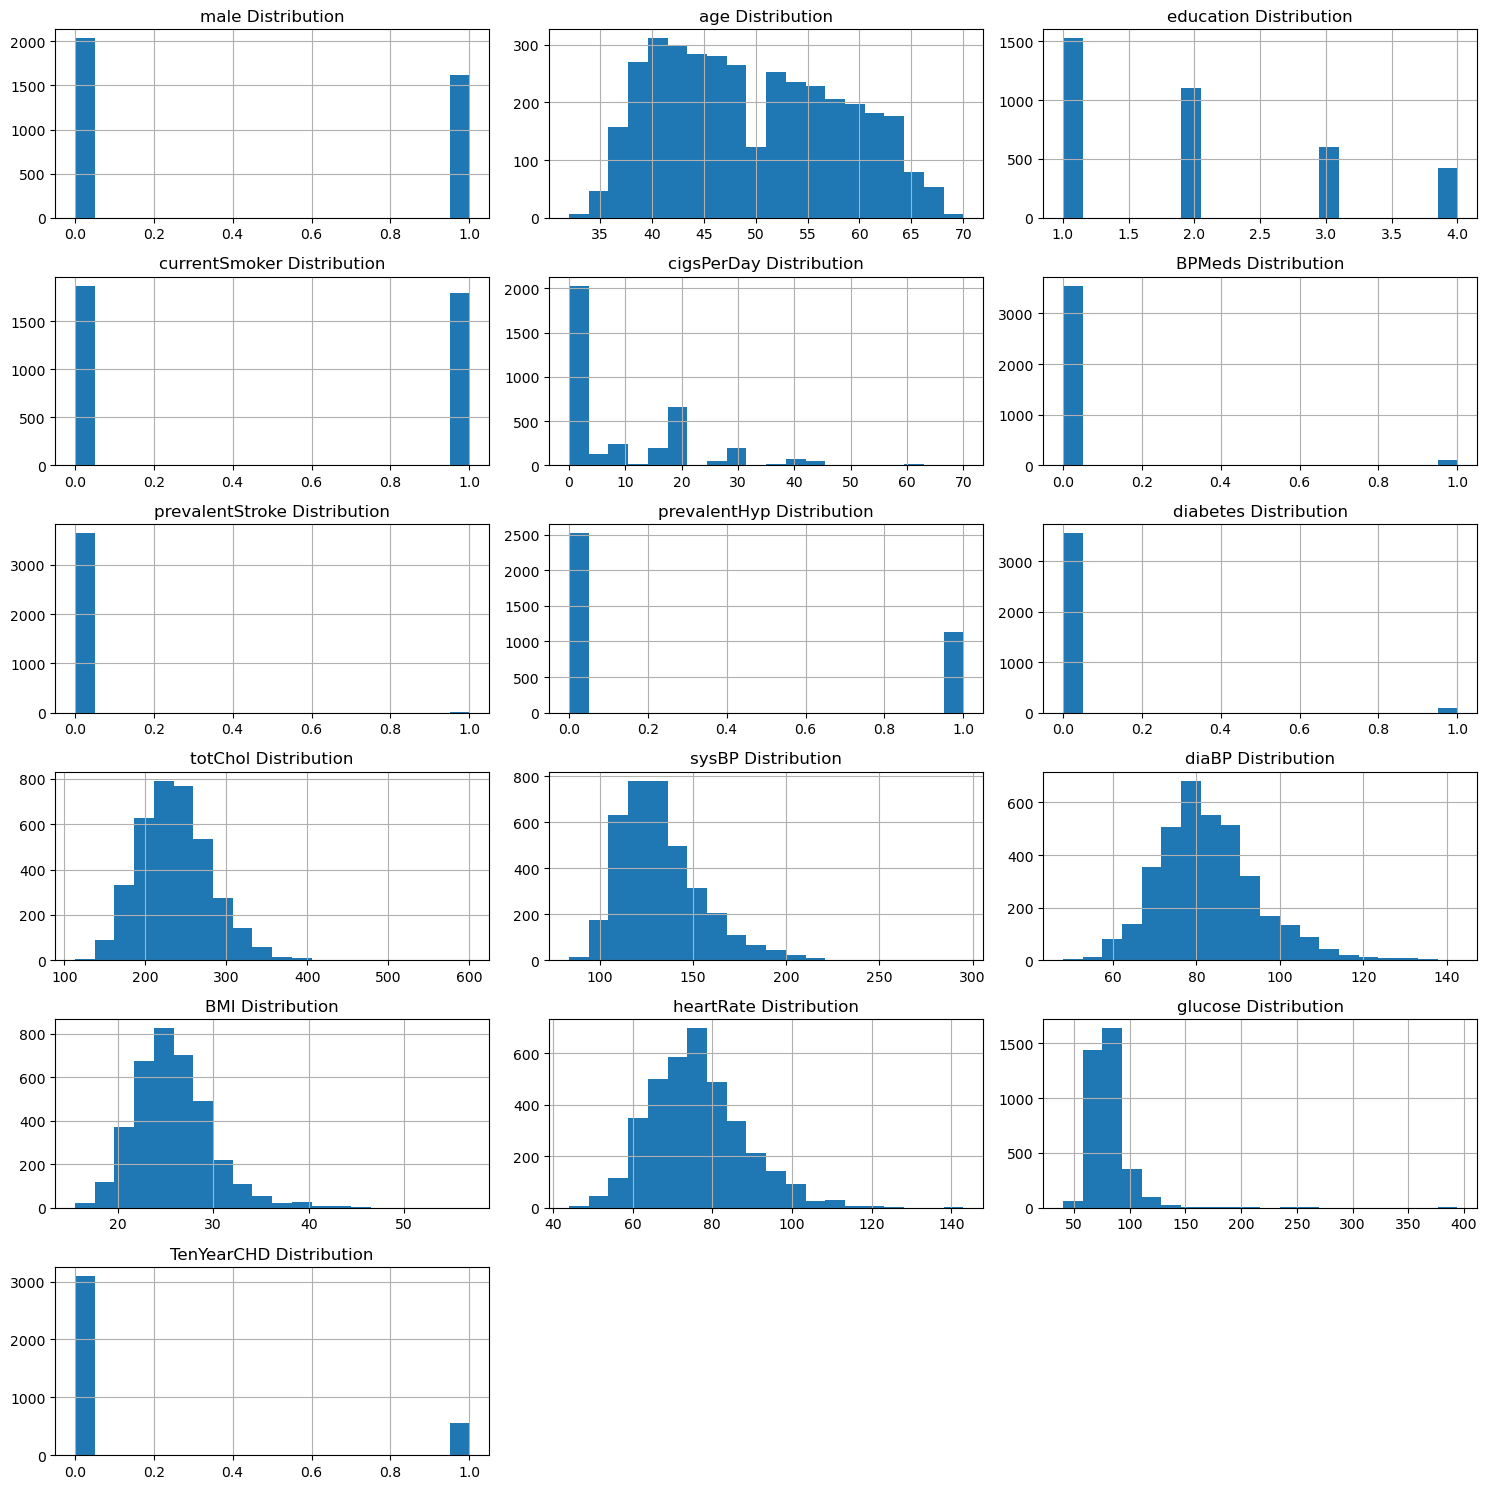

In [15]:
def draw_histograms(dataframe, columns, rows, cols):
    fig=plt.figure(figsize=(15,15))
    for i, feature in enumerate(columns):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax)
        ax.set_title(feature+" Distribution")
        
    fig.tight_layout()  
    plt.show()


draw_histograms(ds,ds.columns,6,3)


Distribution plots for all attributes. Features with continuous values and those with discrete can be easily identified from the plots.

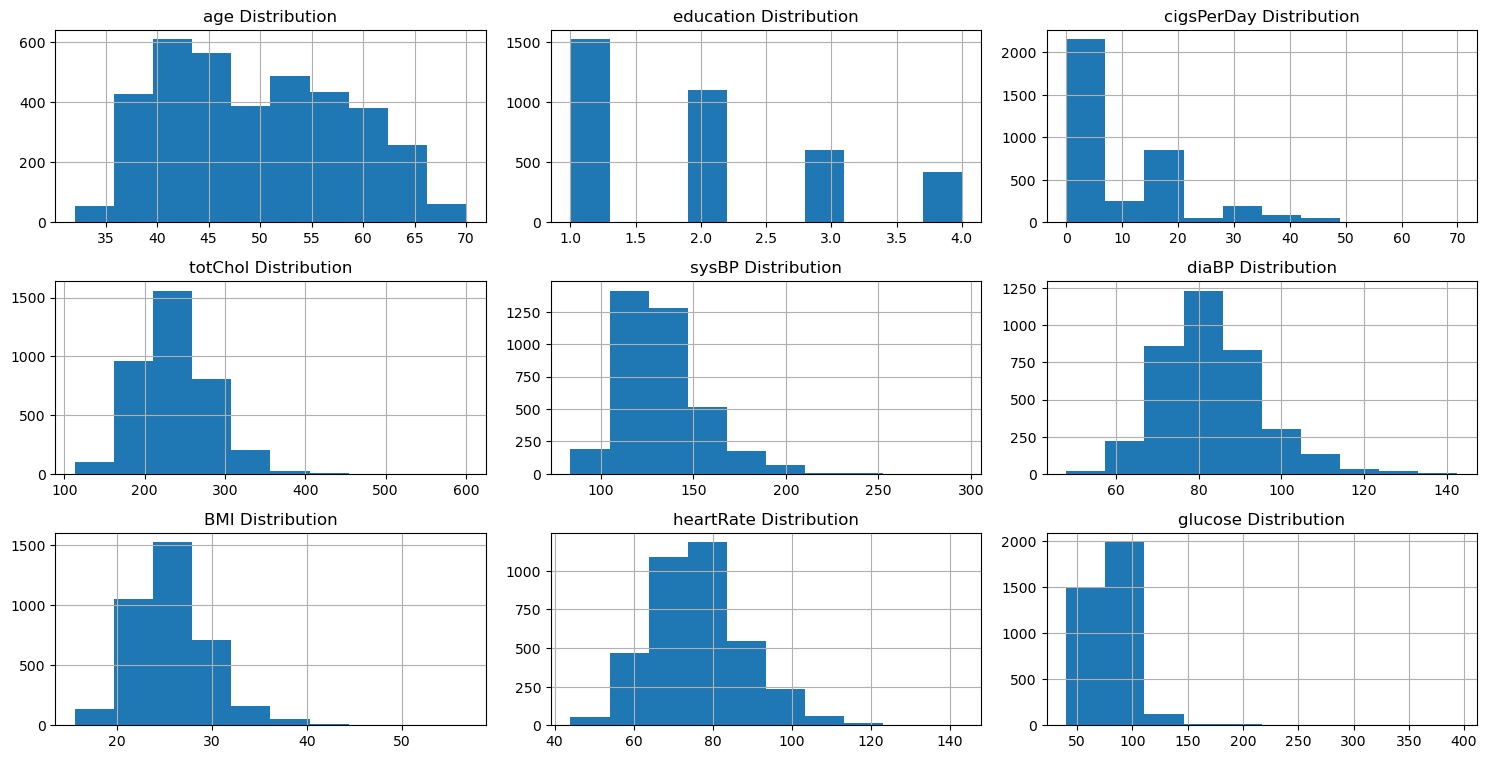

In [16]:
def draw_histogram(dataframe, columns, rows, cols):
    fig=plt.figure(figsize=(15,15))
    for i, feature in enumerate(columns):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(ax=ax)
        ax.set_title(feature+" Distribution")
        
    fig.tight_layout()  
    plt.show()


draw_histogram(ds, ["age", "education", "cigsPerDay", "totChol","sysBP", "diaBP", "BMI", "heartRate", "glucose"], 6,3)

Distribution plots for continuous values.

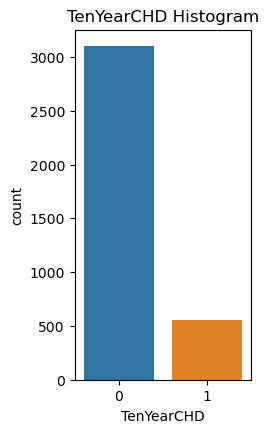

In [17]:
def plot_count(x,fig):
    plt.subplot(2,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(ds[x])

plt.figure(figsize=(5,10))

plot_count("TenYearCHD", 1)
    

Value counts of records with risk of ten year future risk of coronary heart disease. Only about 500 patients have risk of heart disease while more than 3000 patients have no risk of heart disease.

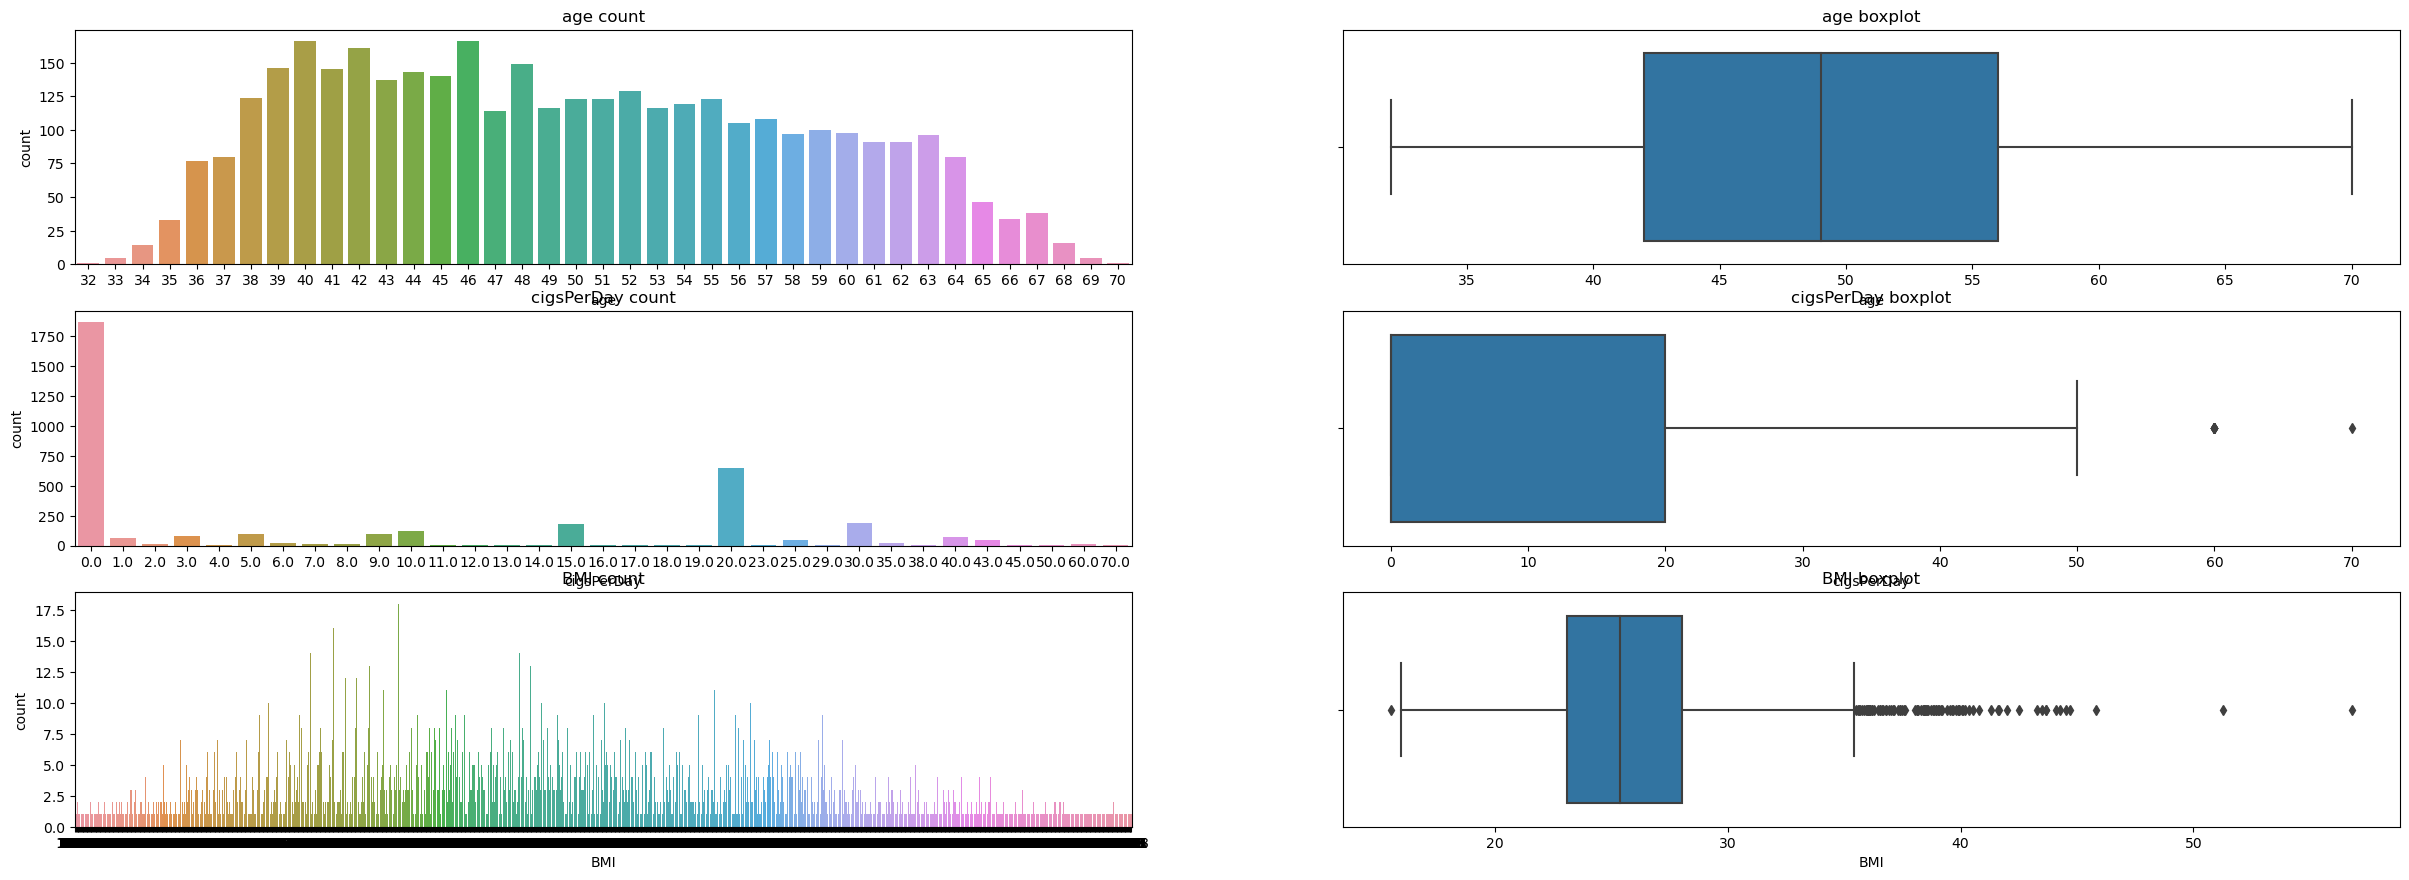

In [18]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' count')
    sns.countplot(ds[x])
    plt.subplot(4,2,(fig+1))
    plt.title(x + ' boxplot')
    sns.boxplot(x=ds[x])

plt.figure(figsize=(30,14))

plot_count("age", 1)
plot_count("cigsPerDay", 3)
plot_count("BMI", 5)

Most number of people range around between 35 to 60 age. Average age of the dataset is around 50. There are no outliers in data.
Most records in cigsPerDay column smoke zero cigarretes per day. There are patients who smoke 60-70 cigarettes per day but those patients are outliers.
Median of body mass index. Boxplot indicates significant outlieres in BMI data

# Bivariate Analysis

<AxesSubplot:xlabel='male', ylabel='TenYearCHD'>

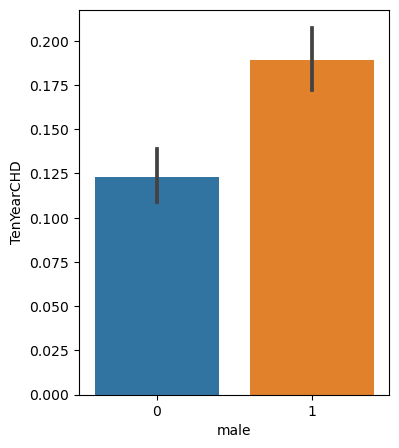

In [19]:
d1 = ds.groupby("male", as_index=False).TenYearCHD.sum()


plt.figure(figsize=(4,5))
sns.barplot(x=ds["male"], y=ds["TenYearCHD"])



1 is male and 0 is female. Males have high risk of coronary heart disease

Text(0, 0.5, 'count')

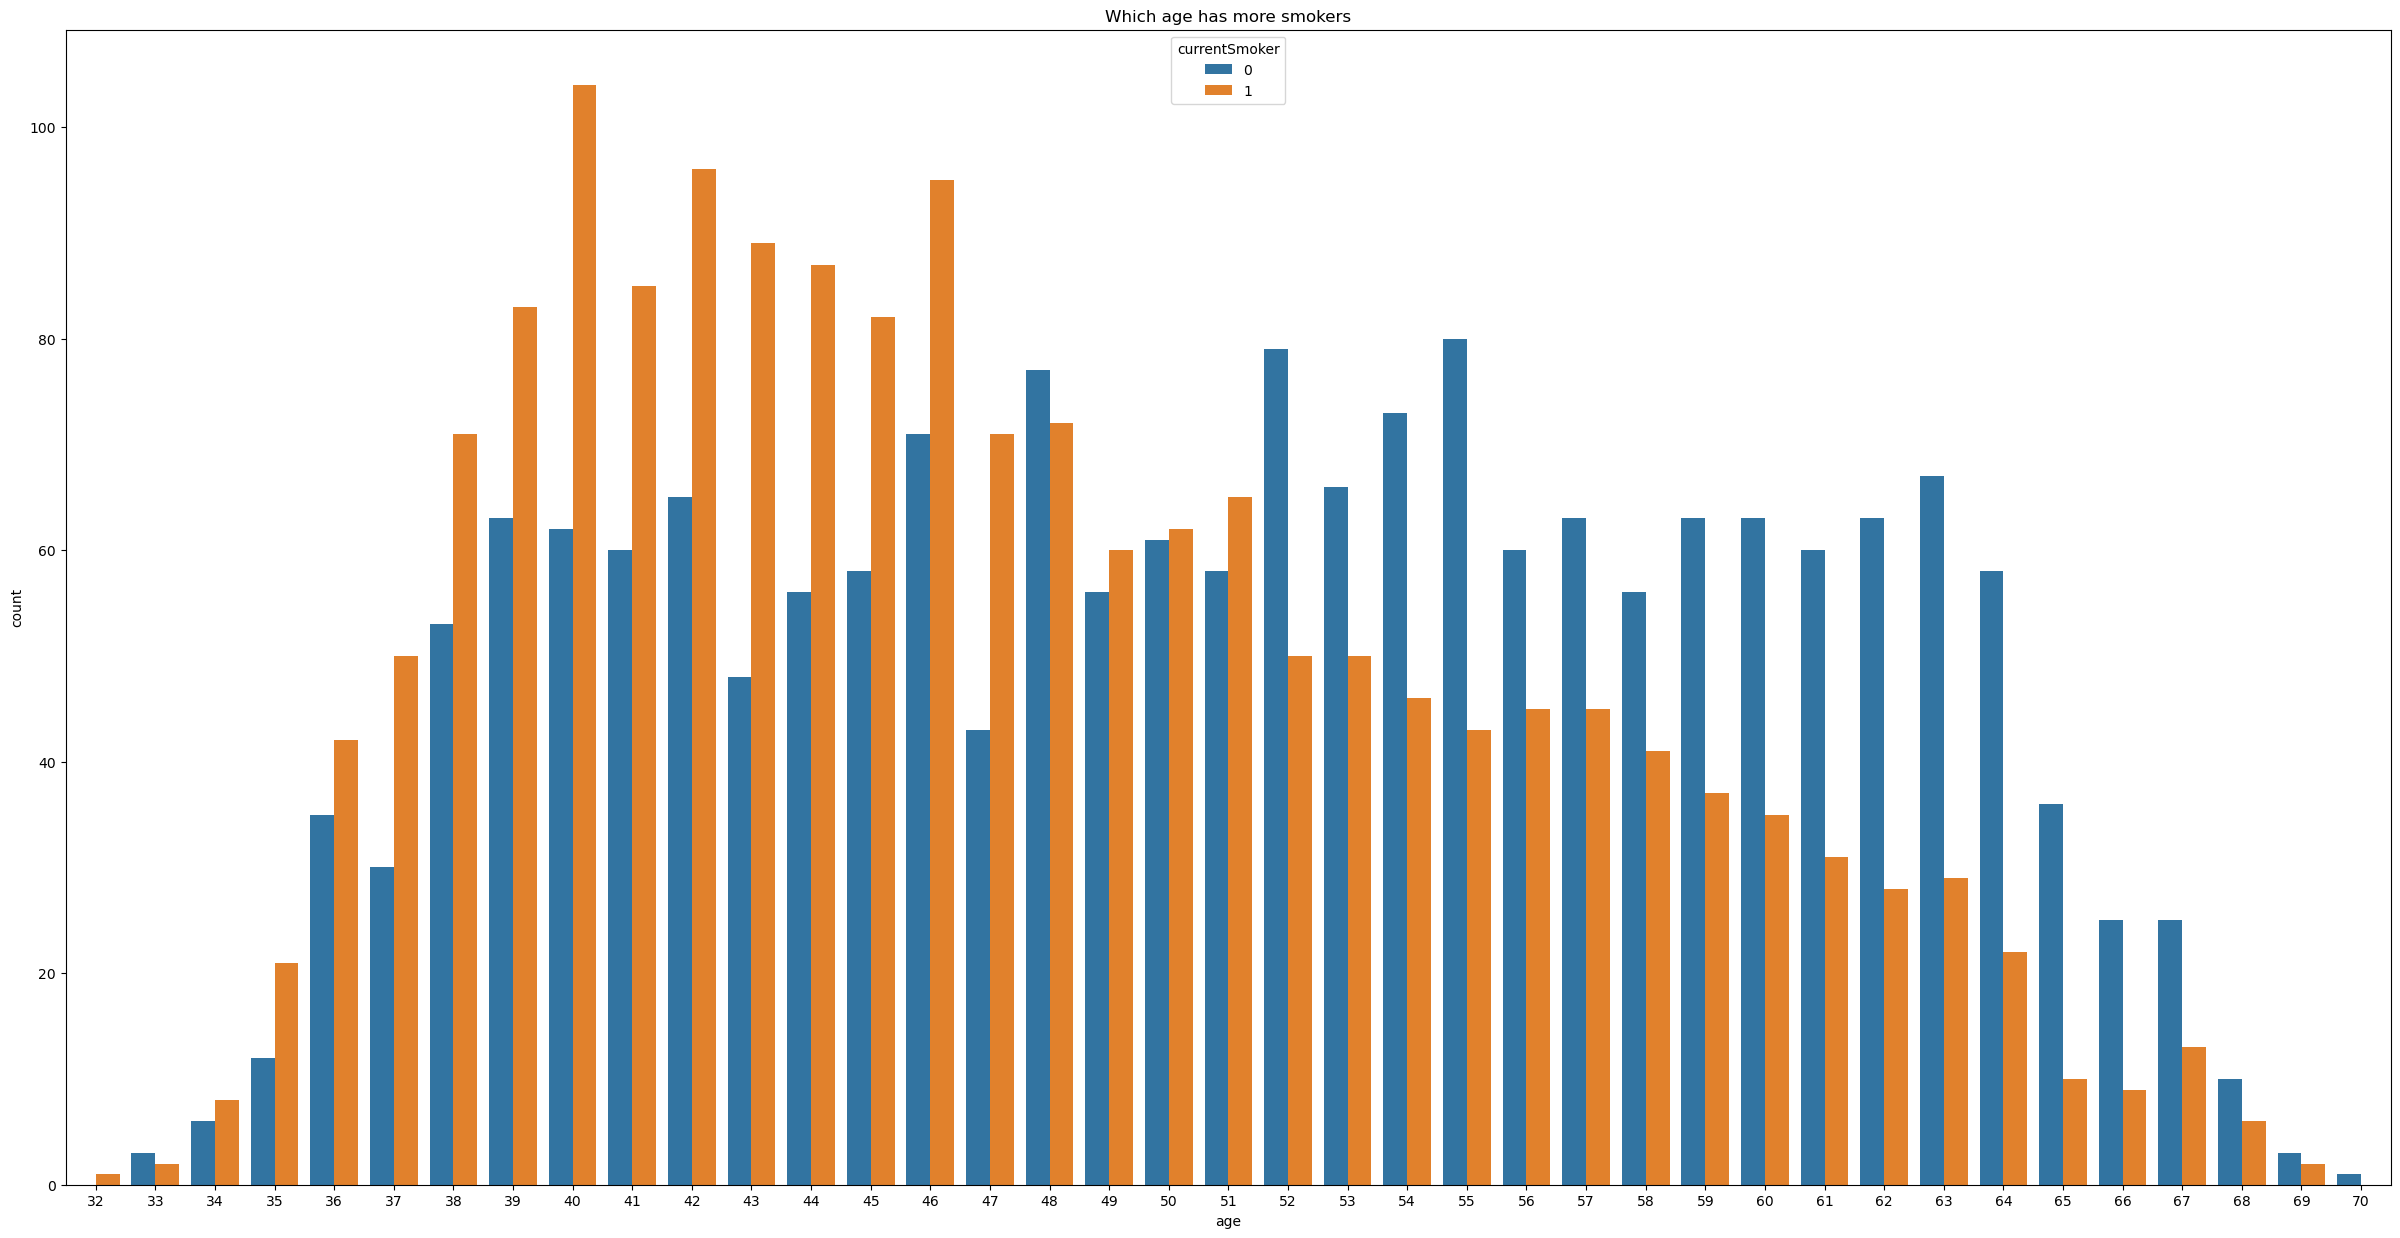

In [20]:
plt.figure(figsize=(30,15))
sns.countplot(x="age",data=ds,hue="currentSmoker")
plt.title("Which age has more smokers")
plt.xlabel("age")
plt.ylabel("count")

Ages from around 35 to 65 smoke more. People with 38 - 45 have more current smokers. No current smoker below 33

<AxesSubplot:xlabel='age', ylabel='TenYearCHD'>

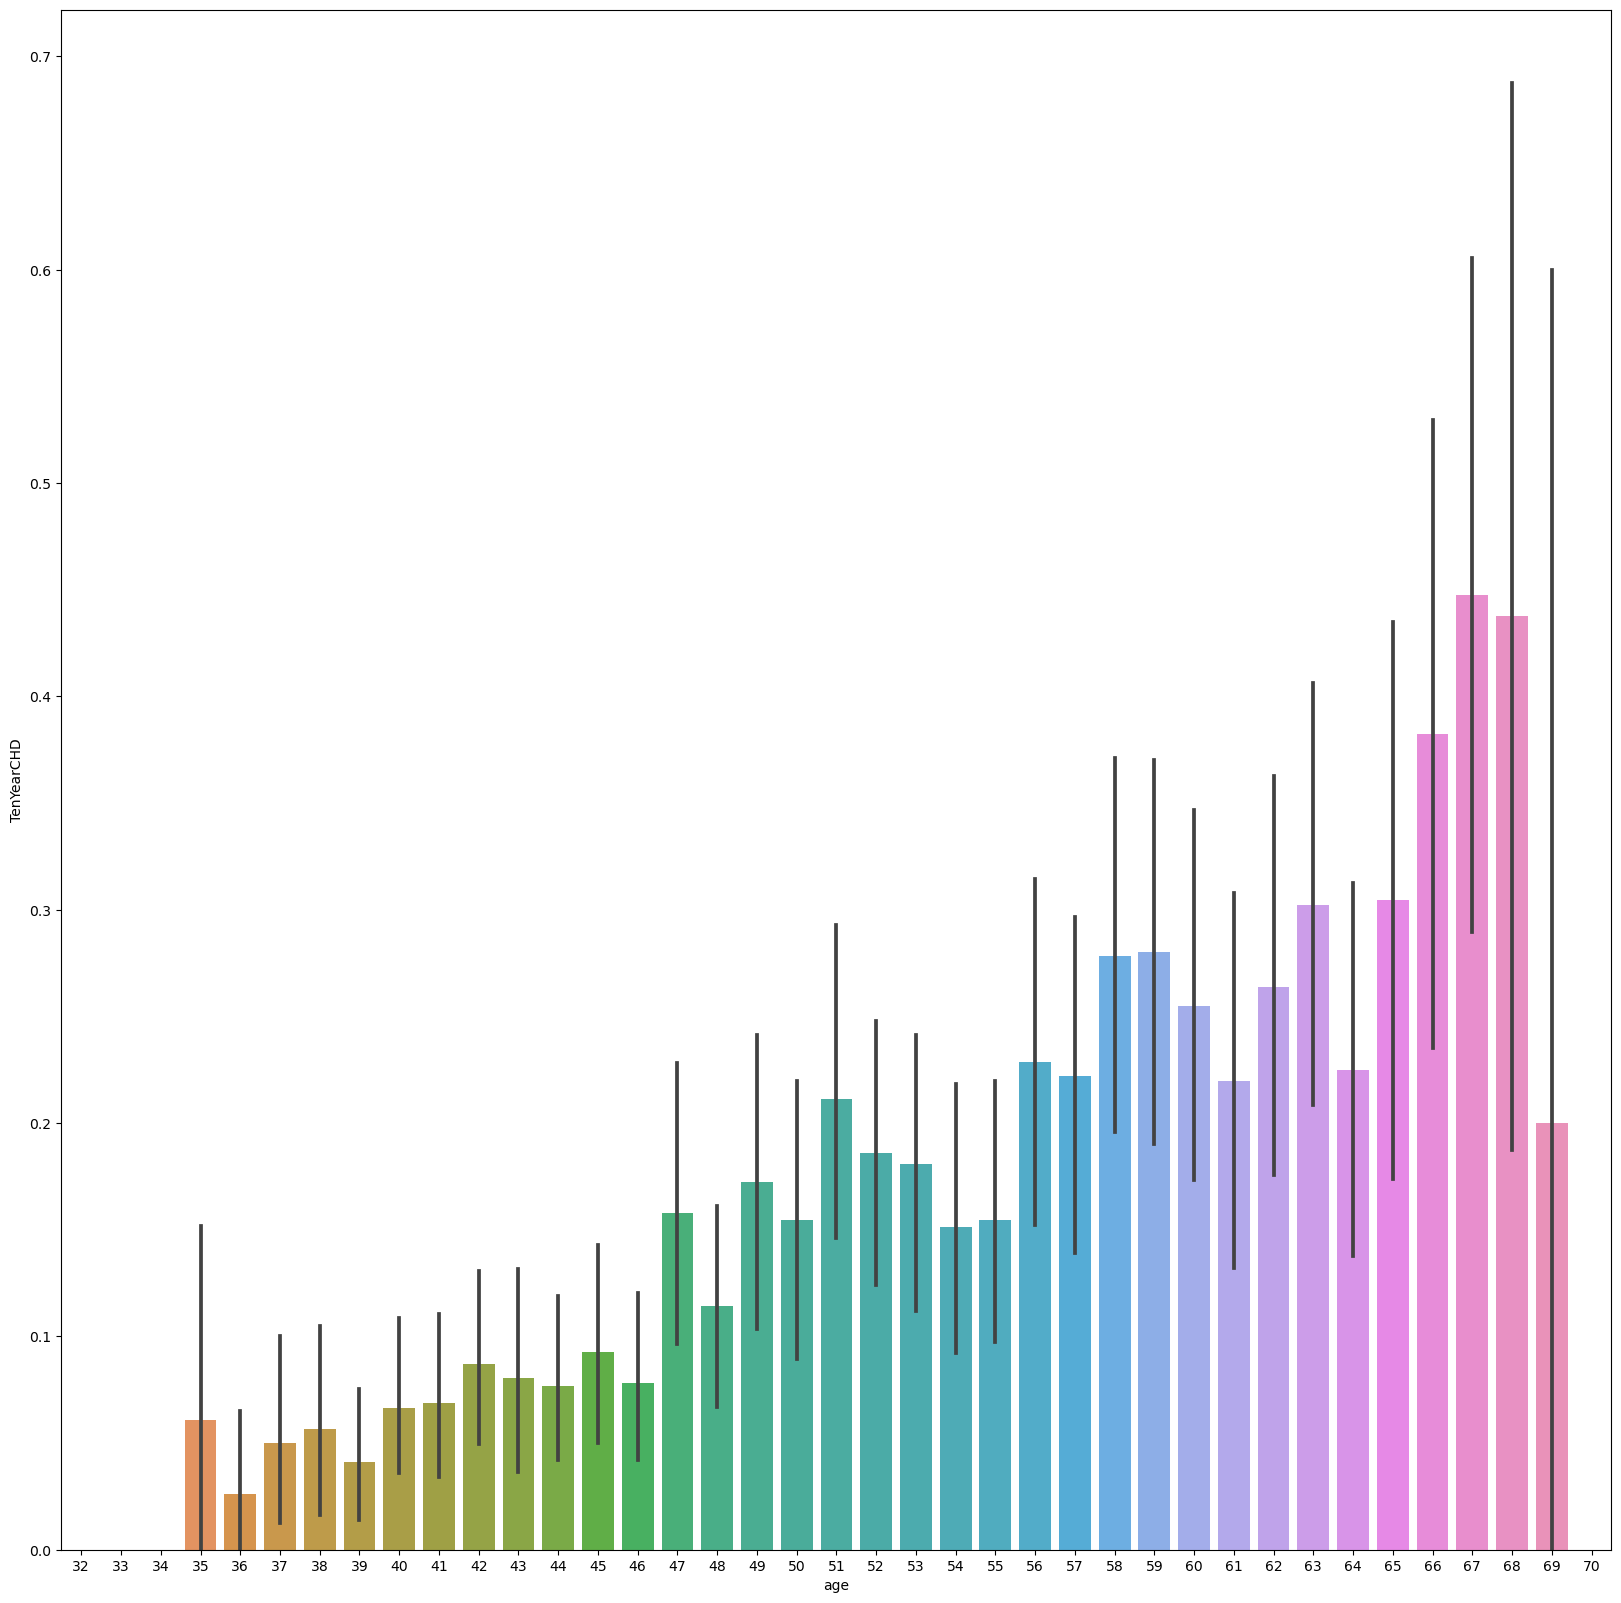

In [21]:
d1 = ds.groupby("age", as_index=False).TenYearCHD.sum()


plt.figure(figsize=(20,20))
sns.barplot(x=ds["age"], y=ds["TenYearCHD"])


Records with higher age seem to have high risk of heart disease

Text(0, 0.5, 'Count of TenYearCHD')

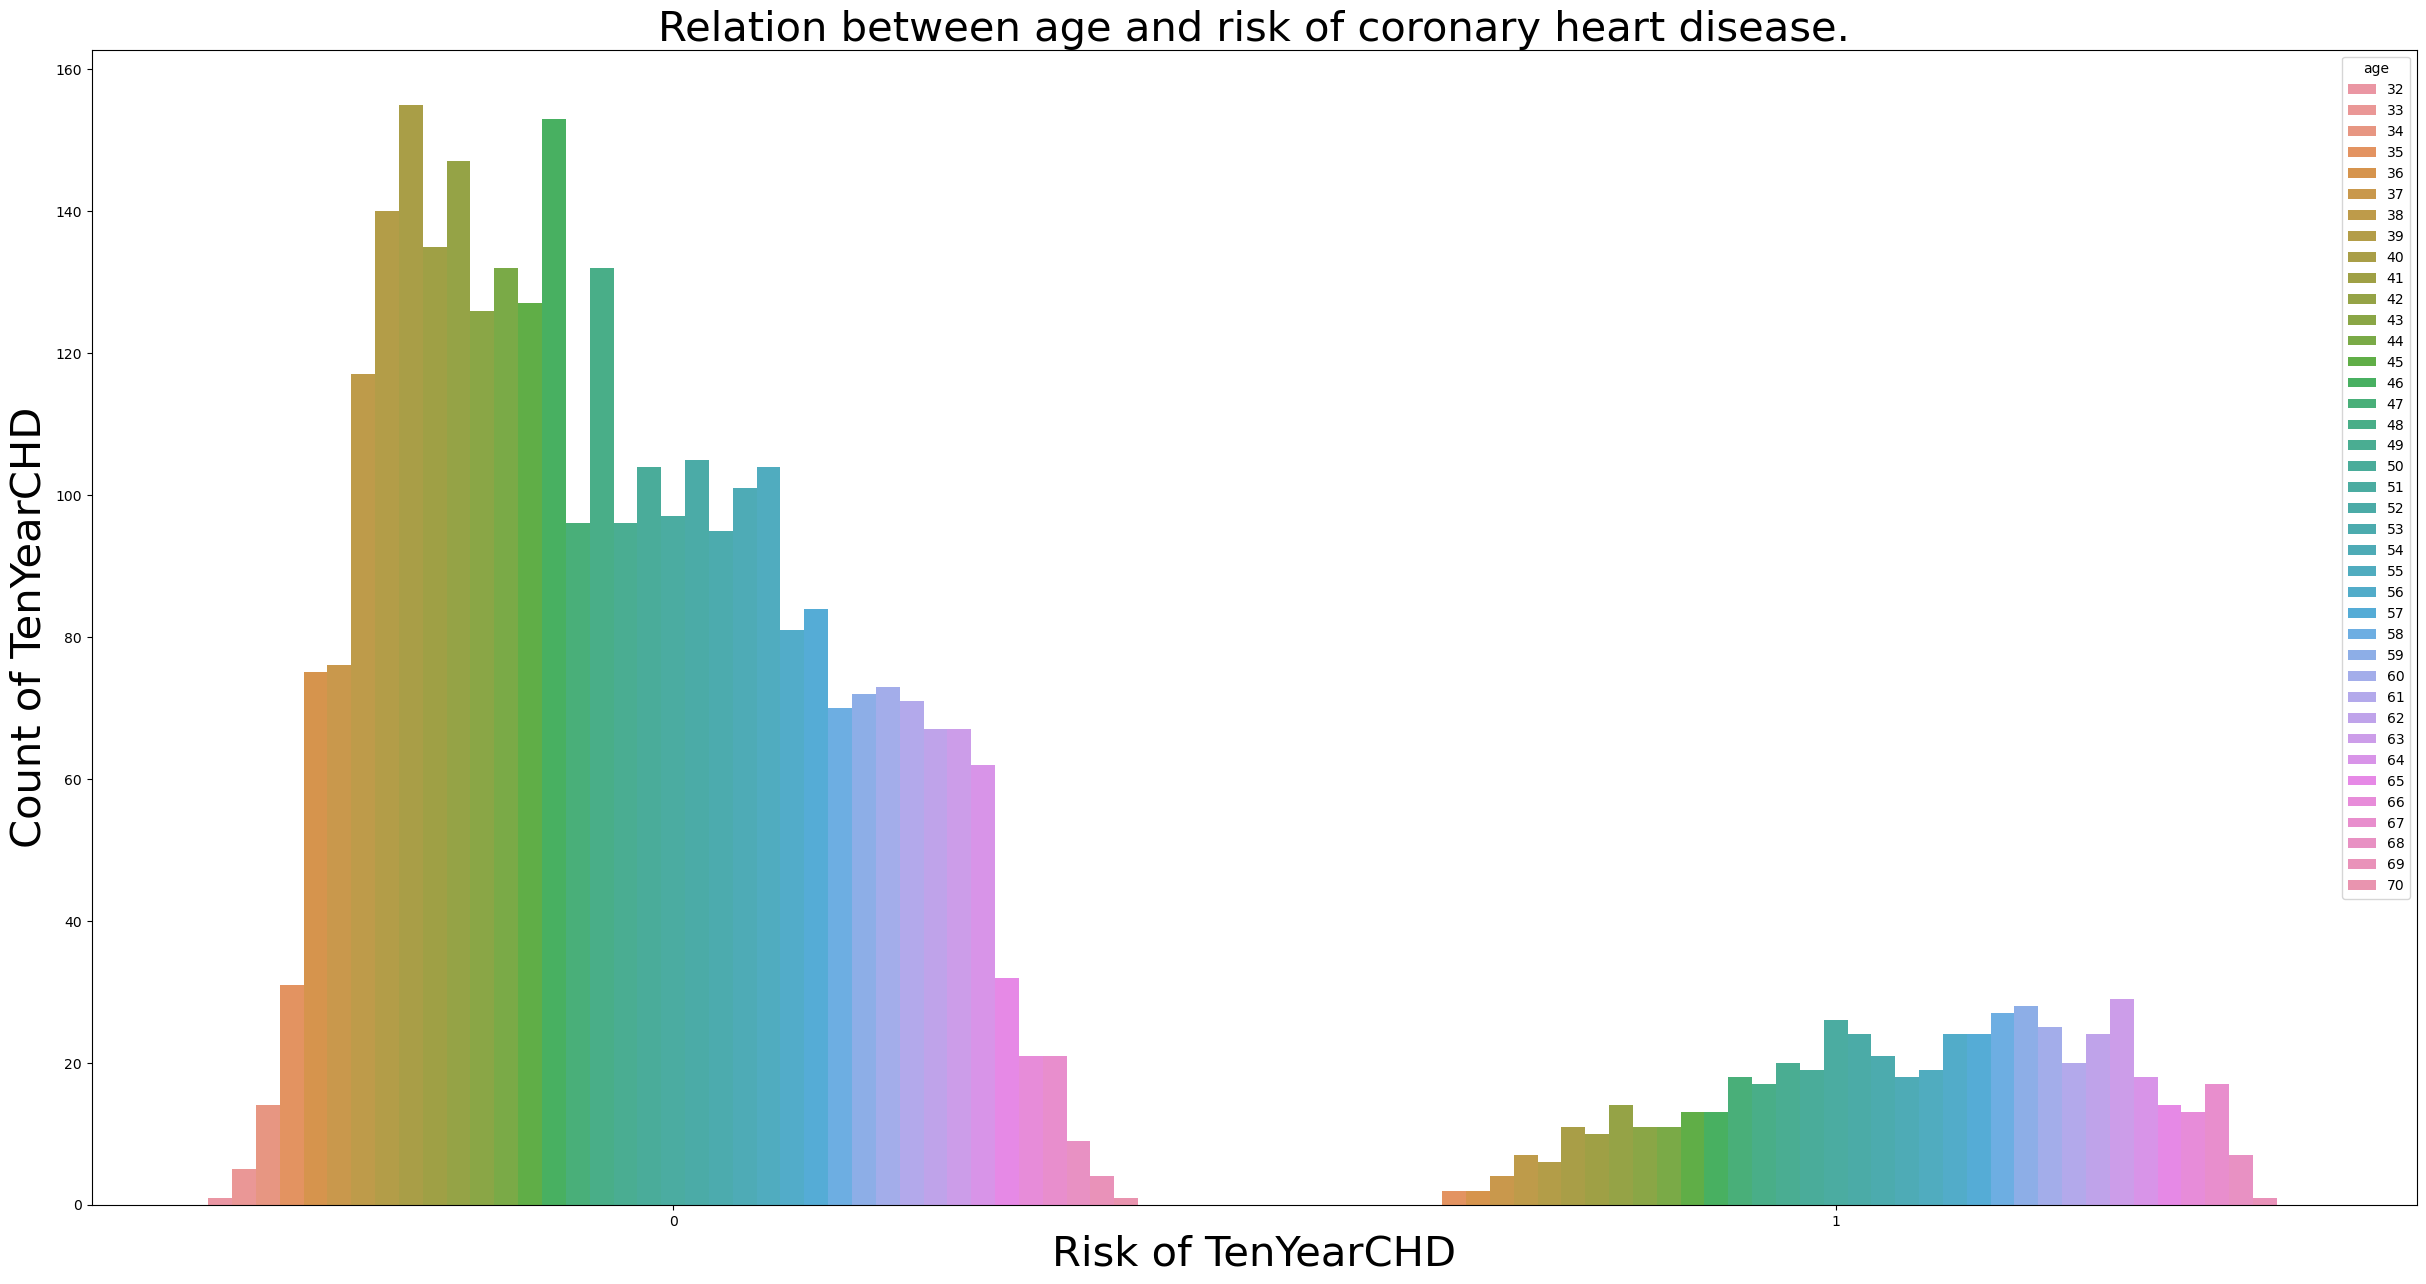

In [22]:
plt.figure(figsize=(30,15))
sns.countplot(x="TenYearCHD",data=ds,hue="age")
plt.title("Relation between age and risk of coronary heart disease.", size=30)
plt.xlabel("Risk of TenYearCHD", size=30)
plt.ylabel("Count of TenYearCHD", size=30)

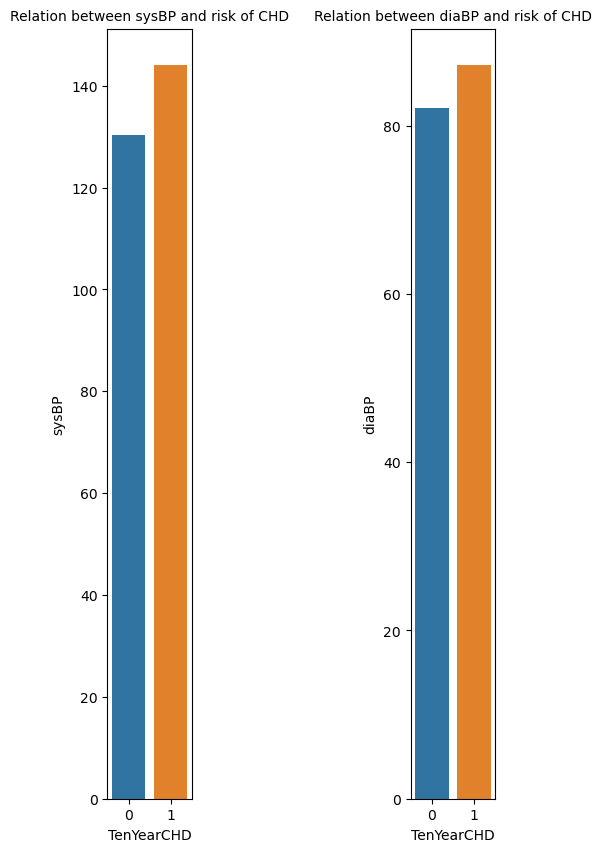

In [23]:
d3 = ds.groupby("TenYearCHD", as_index=False).sysBP.mean()

d4 = ds.groupby("TenYearCHD", as_index=False).diaBP.mean()
def plot_count3(x,y,data,fig, title):
    plt.subplot(1,4,fig)
    plt.title(title, size=10)
    sns.barplot(x=data[x], y=data[y])

plt.figure(figsize=(5,10))


plot_count3("TenYearCHD","sysBP",d3, 1, "Relation between sysBP and risk of CHD")
plot_count3("TenYearCHD","diaBP",d4, 4, "Relation between diaBP and risk of CHD")






Data shows there is minor risk associated in case of both systolic blood pressure and diastolic blood pressure

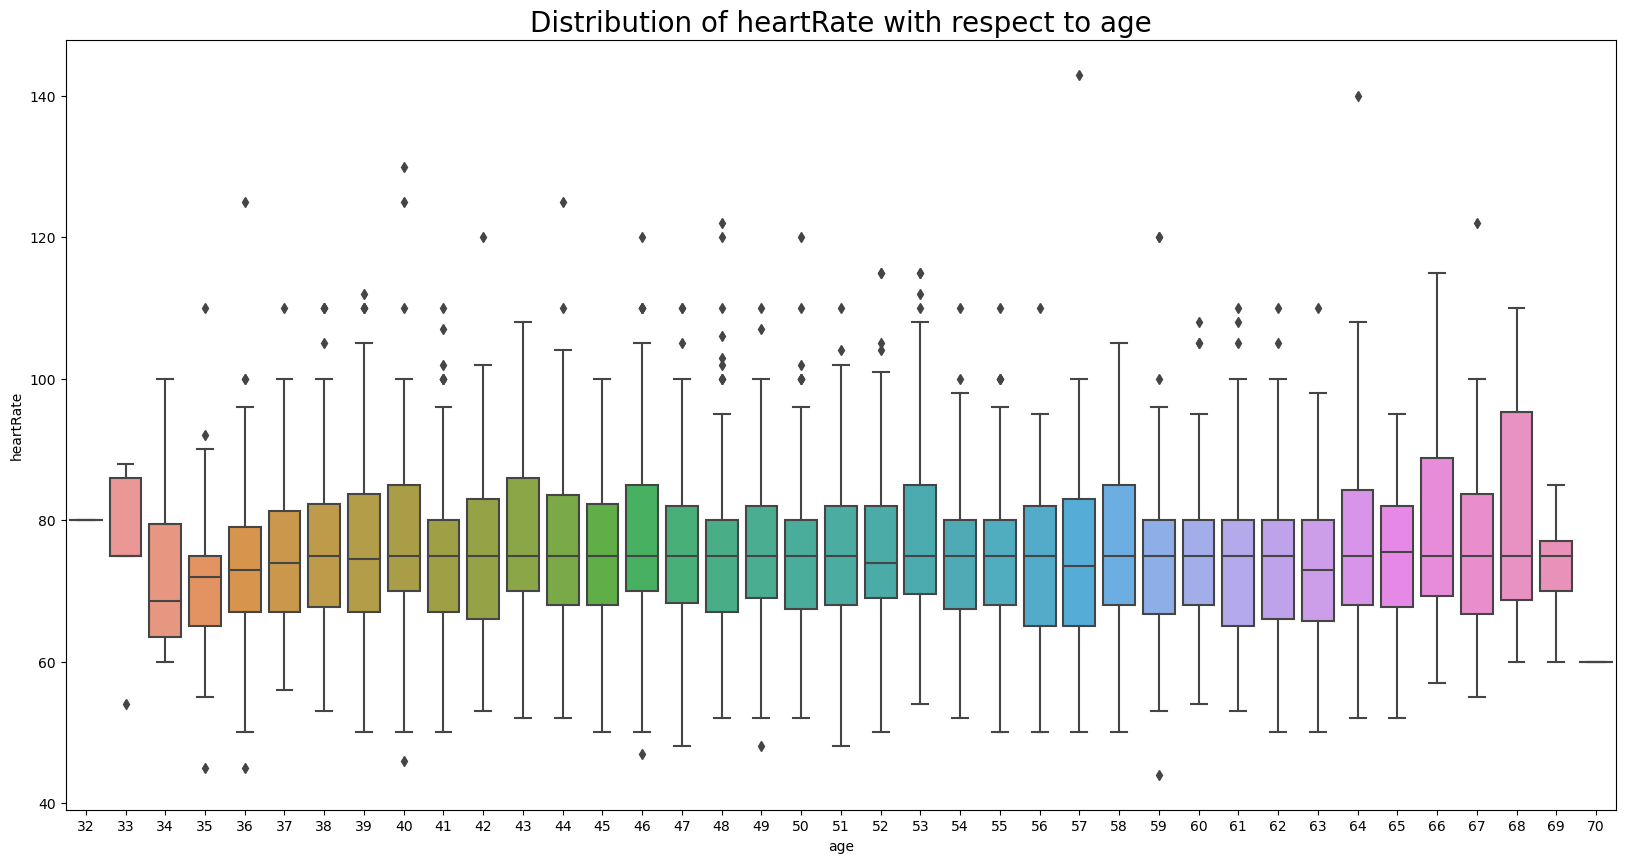

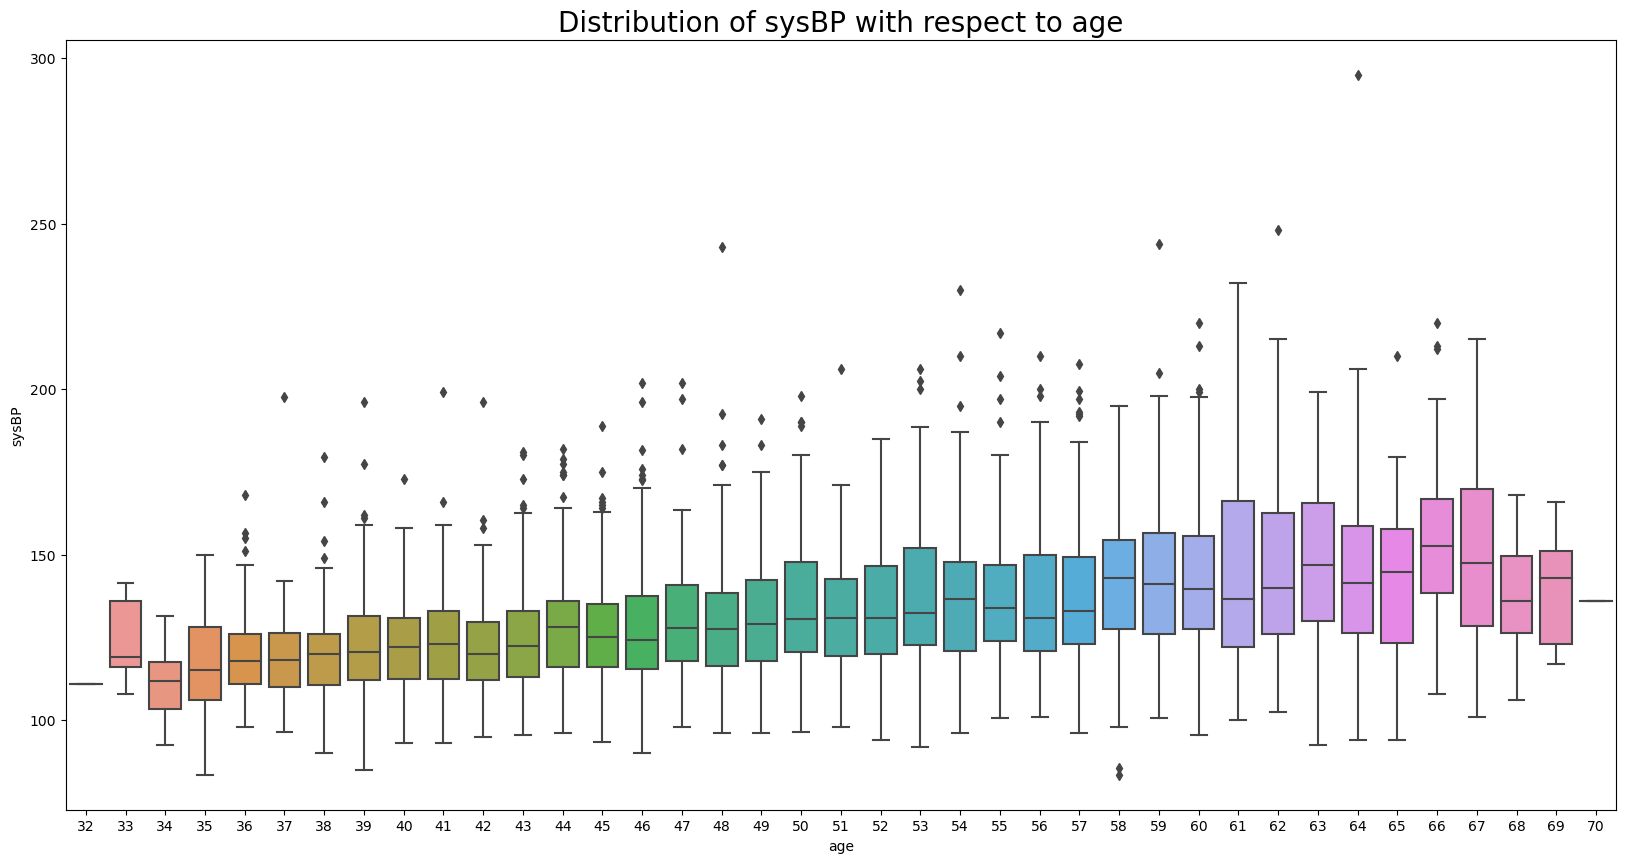

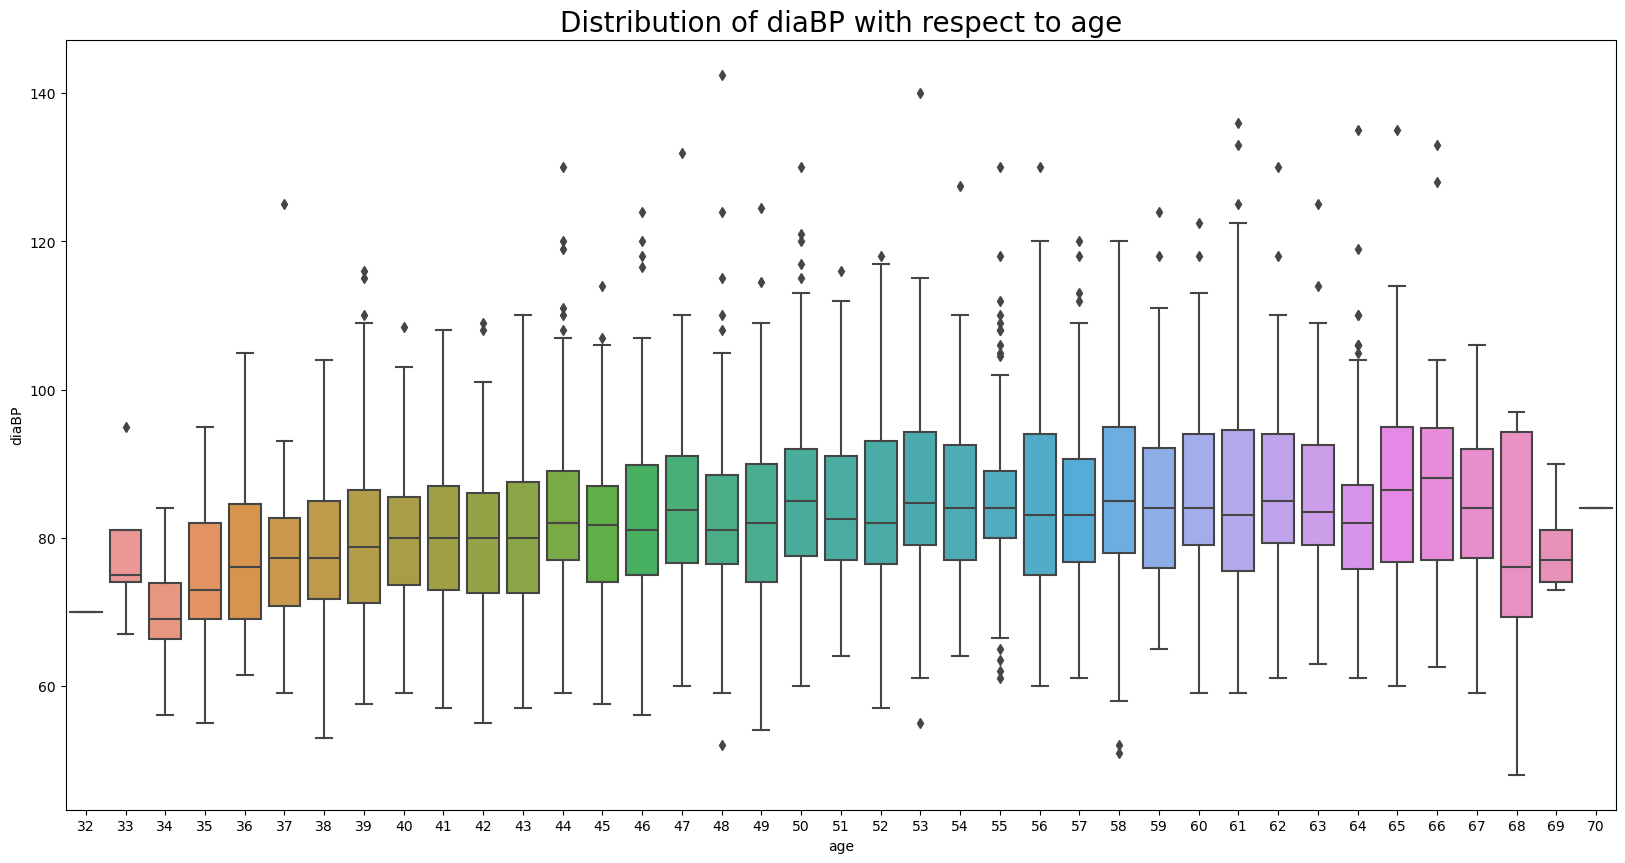

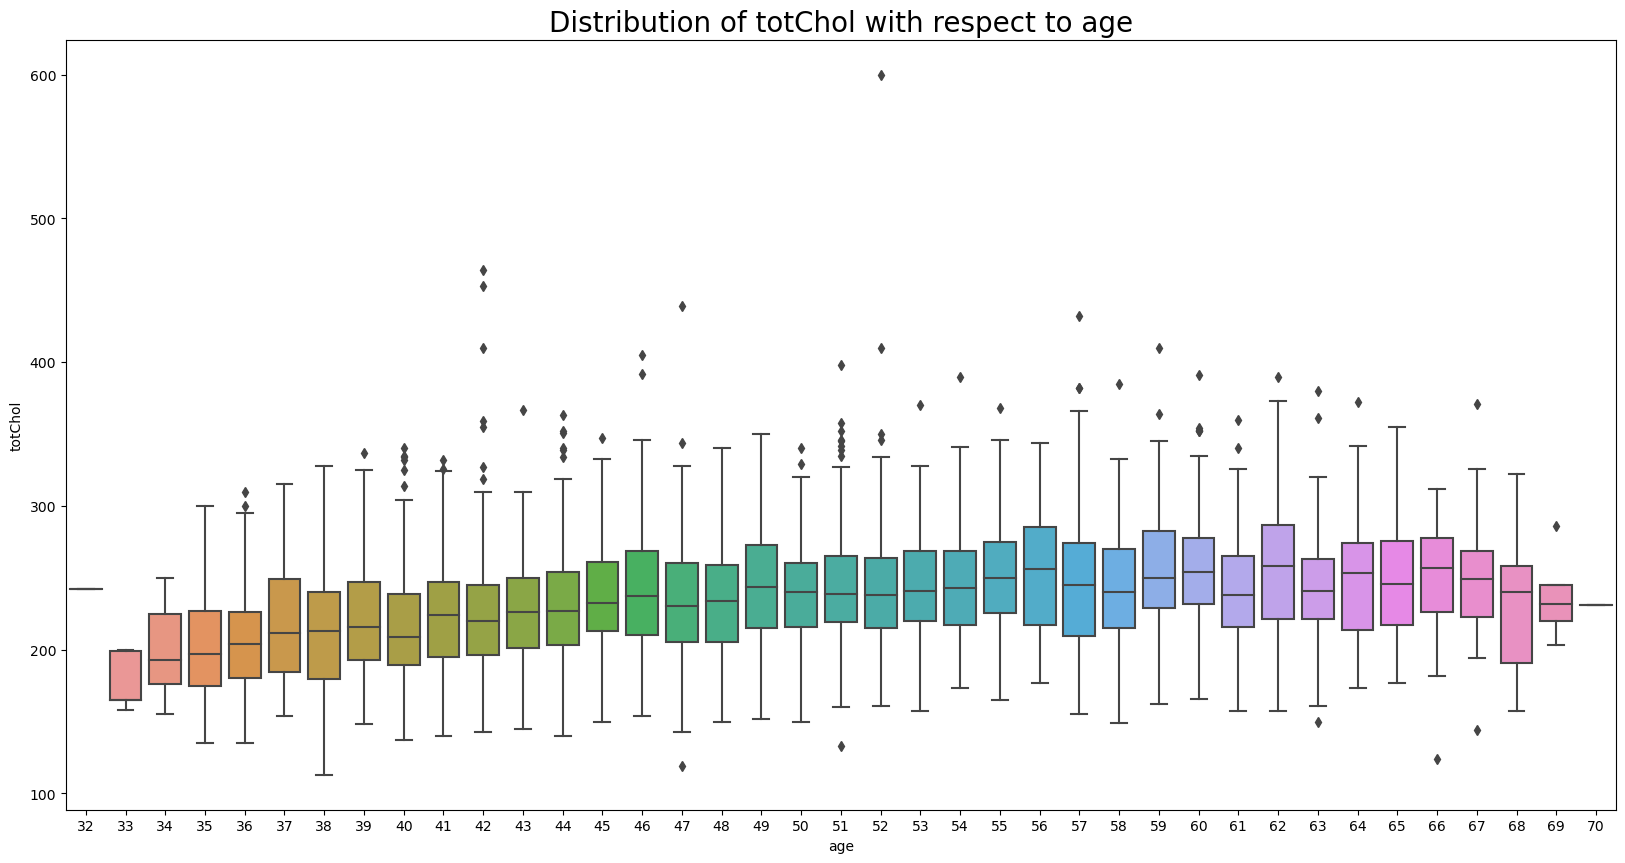

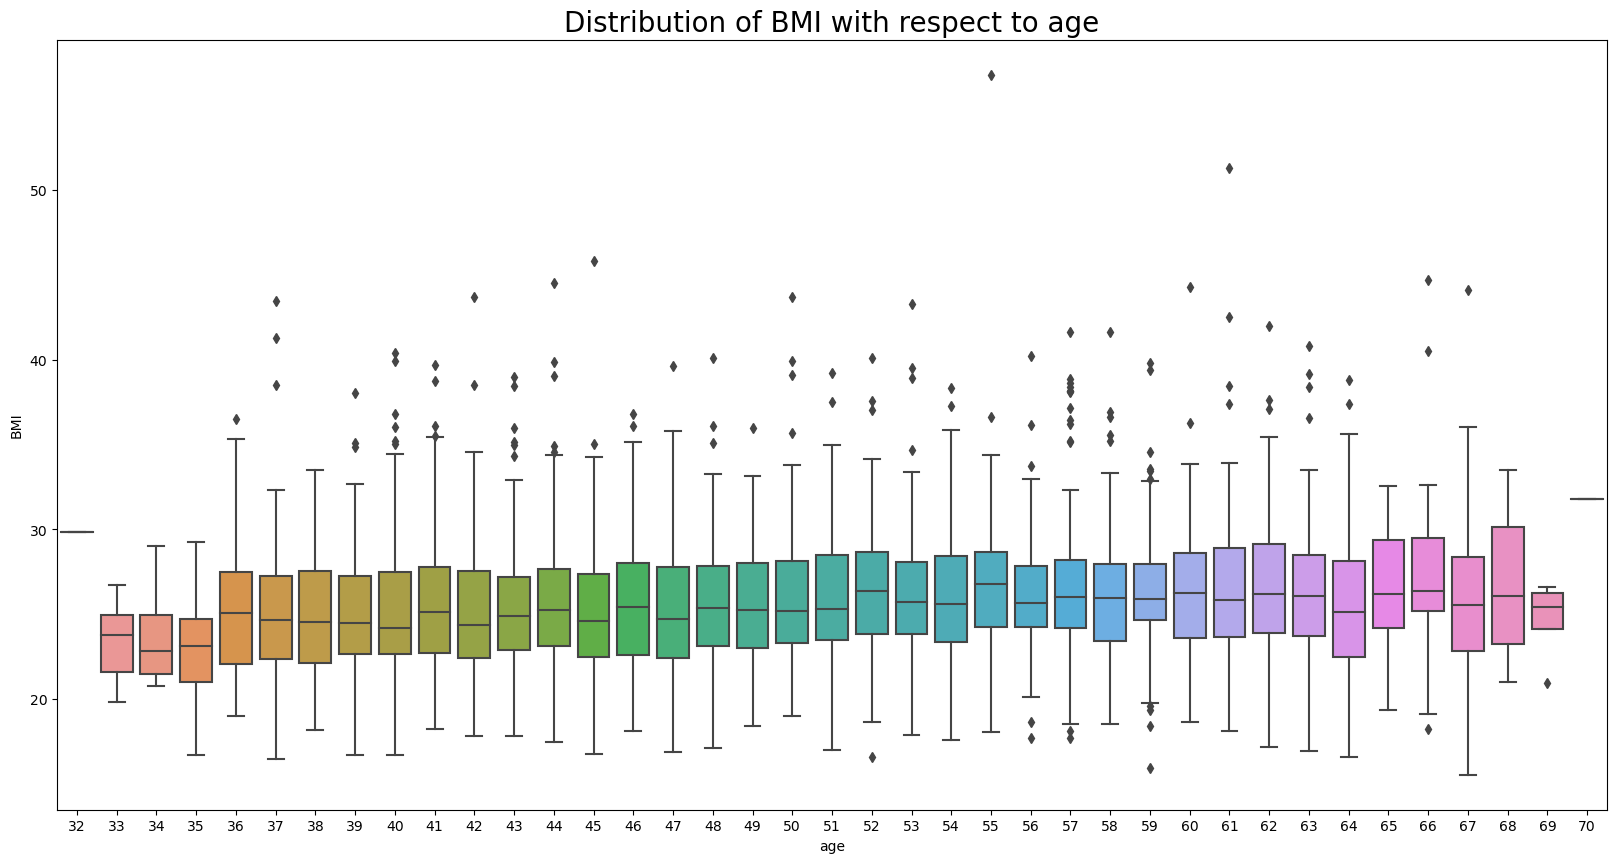

In [24]:
def boxplot(data, x, y, title):
    plt.figure(figsize=(20,10))
    sns.boxplot(x,y,data=data)
    plt.title(title, size=20)
    plt.show()
boxplot(ds, "age", "heartRate",  "Distribution of heartRate with respect to age")
boxplot(ds, "age", "sysBP",  "Distribution of sysBP with respect to age")
boxplot(ds, "age", "diaBP",  "Distribution of diaBP with respect to age")
boxplot(ds, "age", "totChol",  "Distribution of totChol with respect to age")
boxplot(ds, "age", "BMI",  "Distribution of BMI with respect to age")


Heart rate doesn't seem to vary much with age but seems to lower at age 69 - 70.
Values of systolic bp and diastolic bp seem to rise slightly with age. Similar trend is seen for cholestrol.

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024387,0.017677,0.206778,0.331243,-0.052128,-0.002308,0.000806,0.013833,-0.070229,-0.045484,0.051575,0.072867,-0.114923,0.003048,0.091745
age,-0.024387,1.000000,-0.158961,-0.210862,-0.189099,0.134670,0.050864,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,-0.002685,0.118245,0.233810
education,0.017677,-0.158961,1.000000,0.025253,0.013527,-0.013647,-0.030353,-0.079100,-0.039547,-0.012956,-0.124511,-0.058502,-0.137280,-0.064254,-0.031874,-0.063068
currentSmoker,0.206778,-0.210862,0.025253,1.000000,0.773819,-0.051936,-0.038159,-0.107561,-0.041859,-0.051119,-0.134371,-0.115748,-0.159574,0.050452,-0.053346,0.019176
cigsPerDay,0.331243,-0.189099,0.013527,0.773819,1.000000,-0.046479,-0.036283,-0.069890,-0.036934,-0.030222,-0.094764,-0.056650,-0.086888,0.063549,-0.053803,0.052159
BPMeds,-0.052128,0.134670,-0.013647,-0.051936,-0.046479,1.000000,0.113119,0.263047,0.049051,0.094011,0.271291,0.199750,0.105603,0.012894,0.054210,0.089116
prevalentStroke,-0.002308,0.050864,-0.030353,-0.038159,-0.036283,0.113119,1.000000,0.066098,0.009619,0.012697,0.061080,0.055878,0.036478,-0.017020,0.016051,0.048351
prevalentHyp,0.000806,0.306693,-0.079100,-0.107561,-0.069890,0.263047,0.066098,1.000000,0.080623,0.167074,0.697790,0.617634,0.302917,0.147333,0.087129,0.181556
diabetes,0.013833,0.109027,-0.039547,-0.041859,-0.036934,0.049051,0.009619,0.080623,1.000000,0.048371,0.102574,0.050767,0.088970,0.060996,0.614817,0.093397
totChol,-0.070229,0.267764,-0.012956,-0.051119,-0.030222,0.094011,0.012697,0.167074,0.048371,1.000000,0.220130,0.174986,0.120799,0.093057,0.049749,0.091127


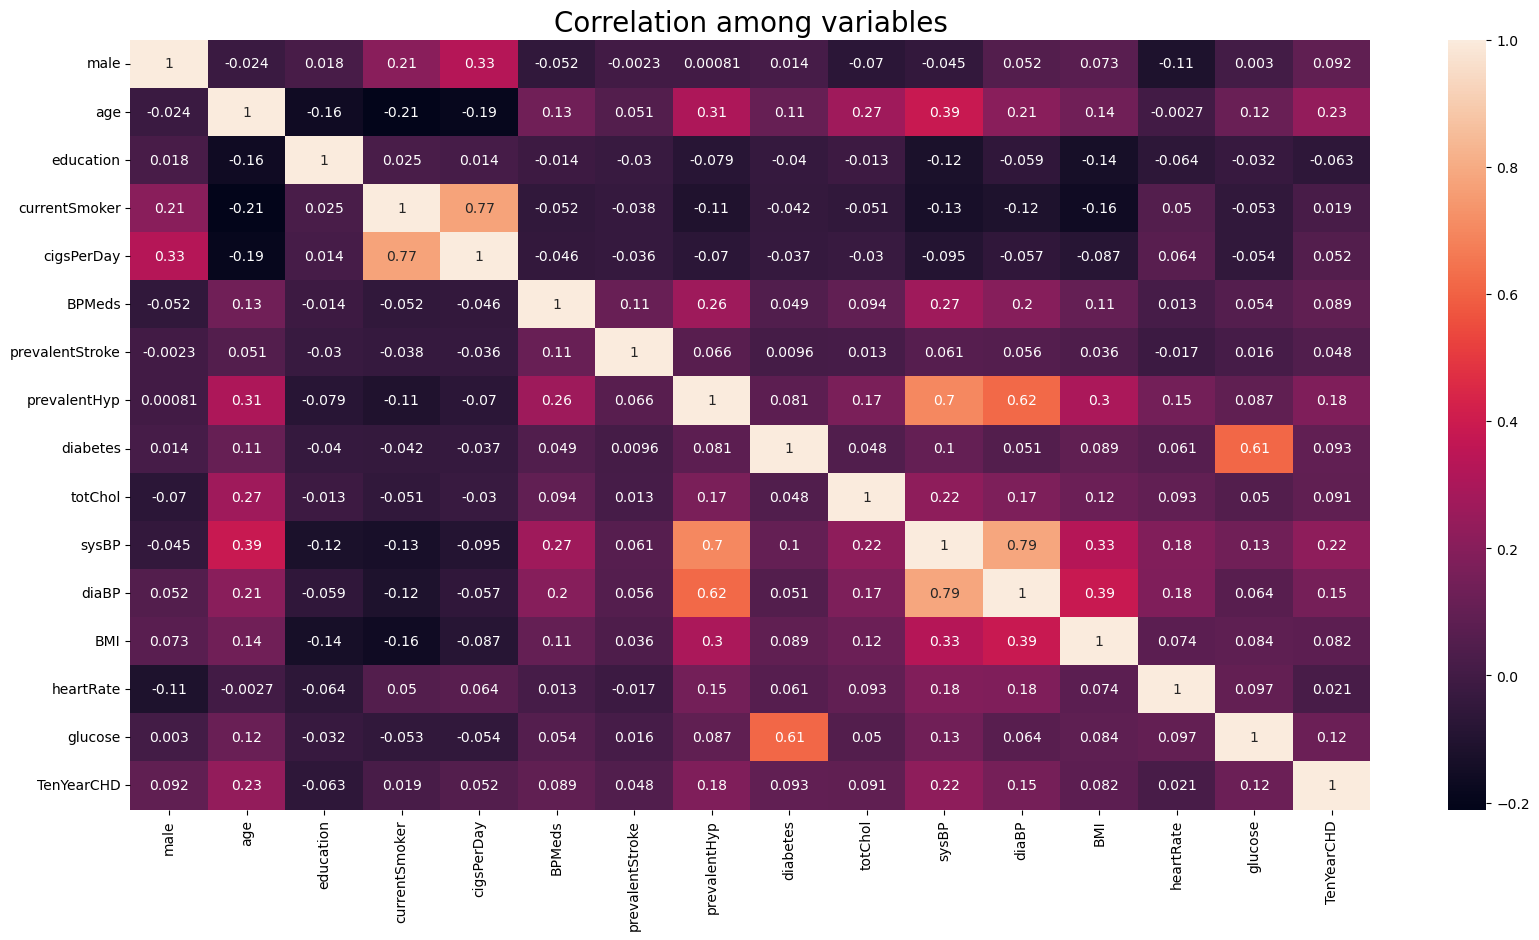

In [25]:
cor=ds.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among variables", size=20)
cor

Education has a negative correlation with TenYearCHD which is the target variable. No variable seems to have strong correlation with target variable.
Age variable has the strongest correlation with target variable

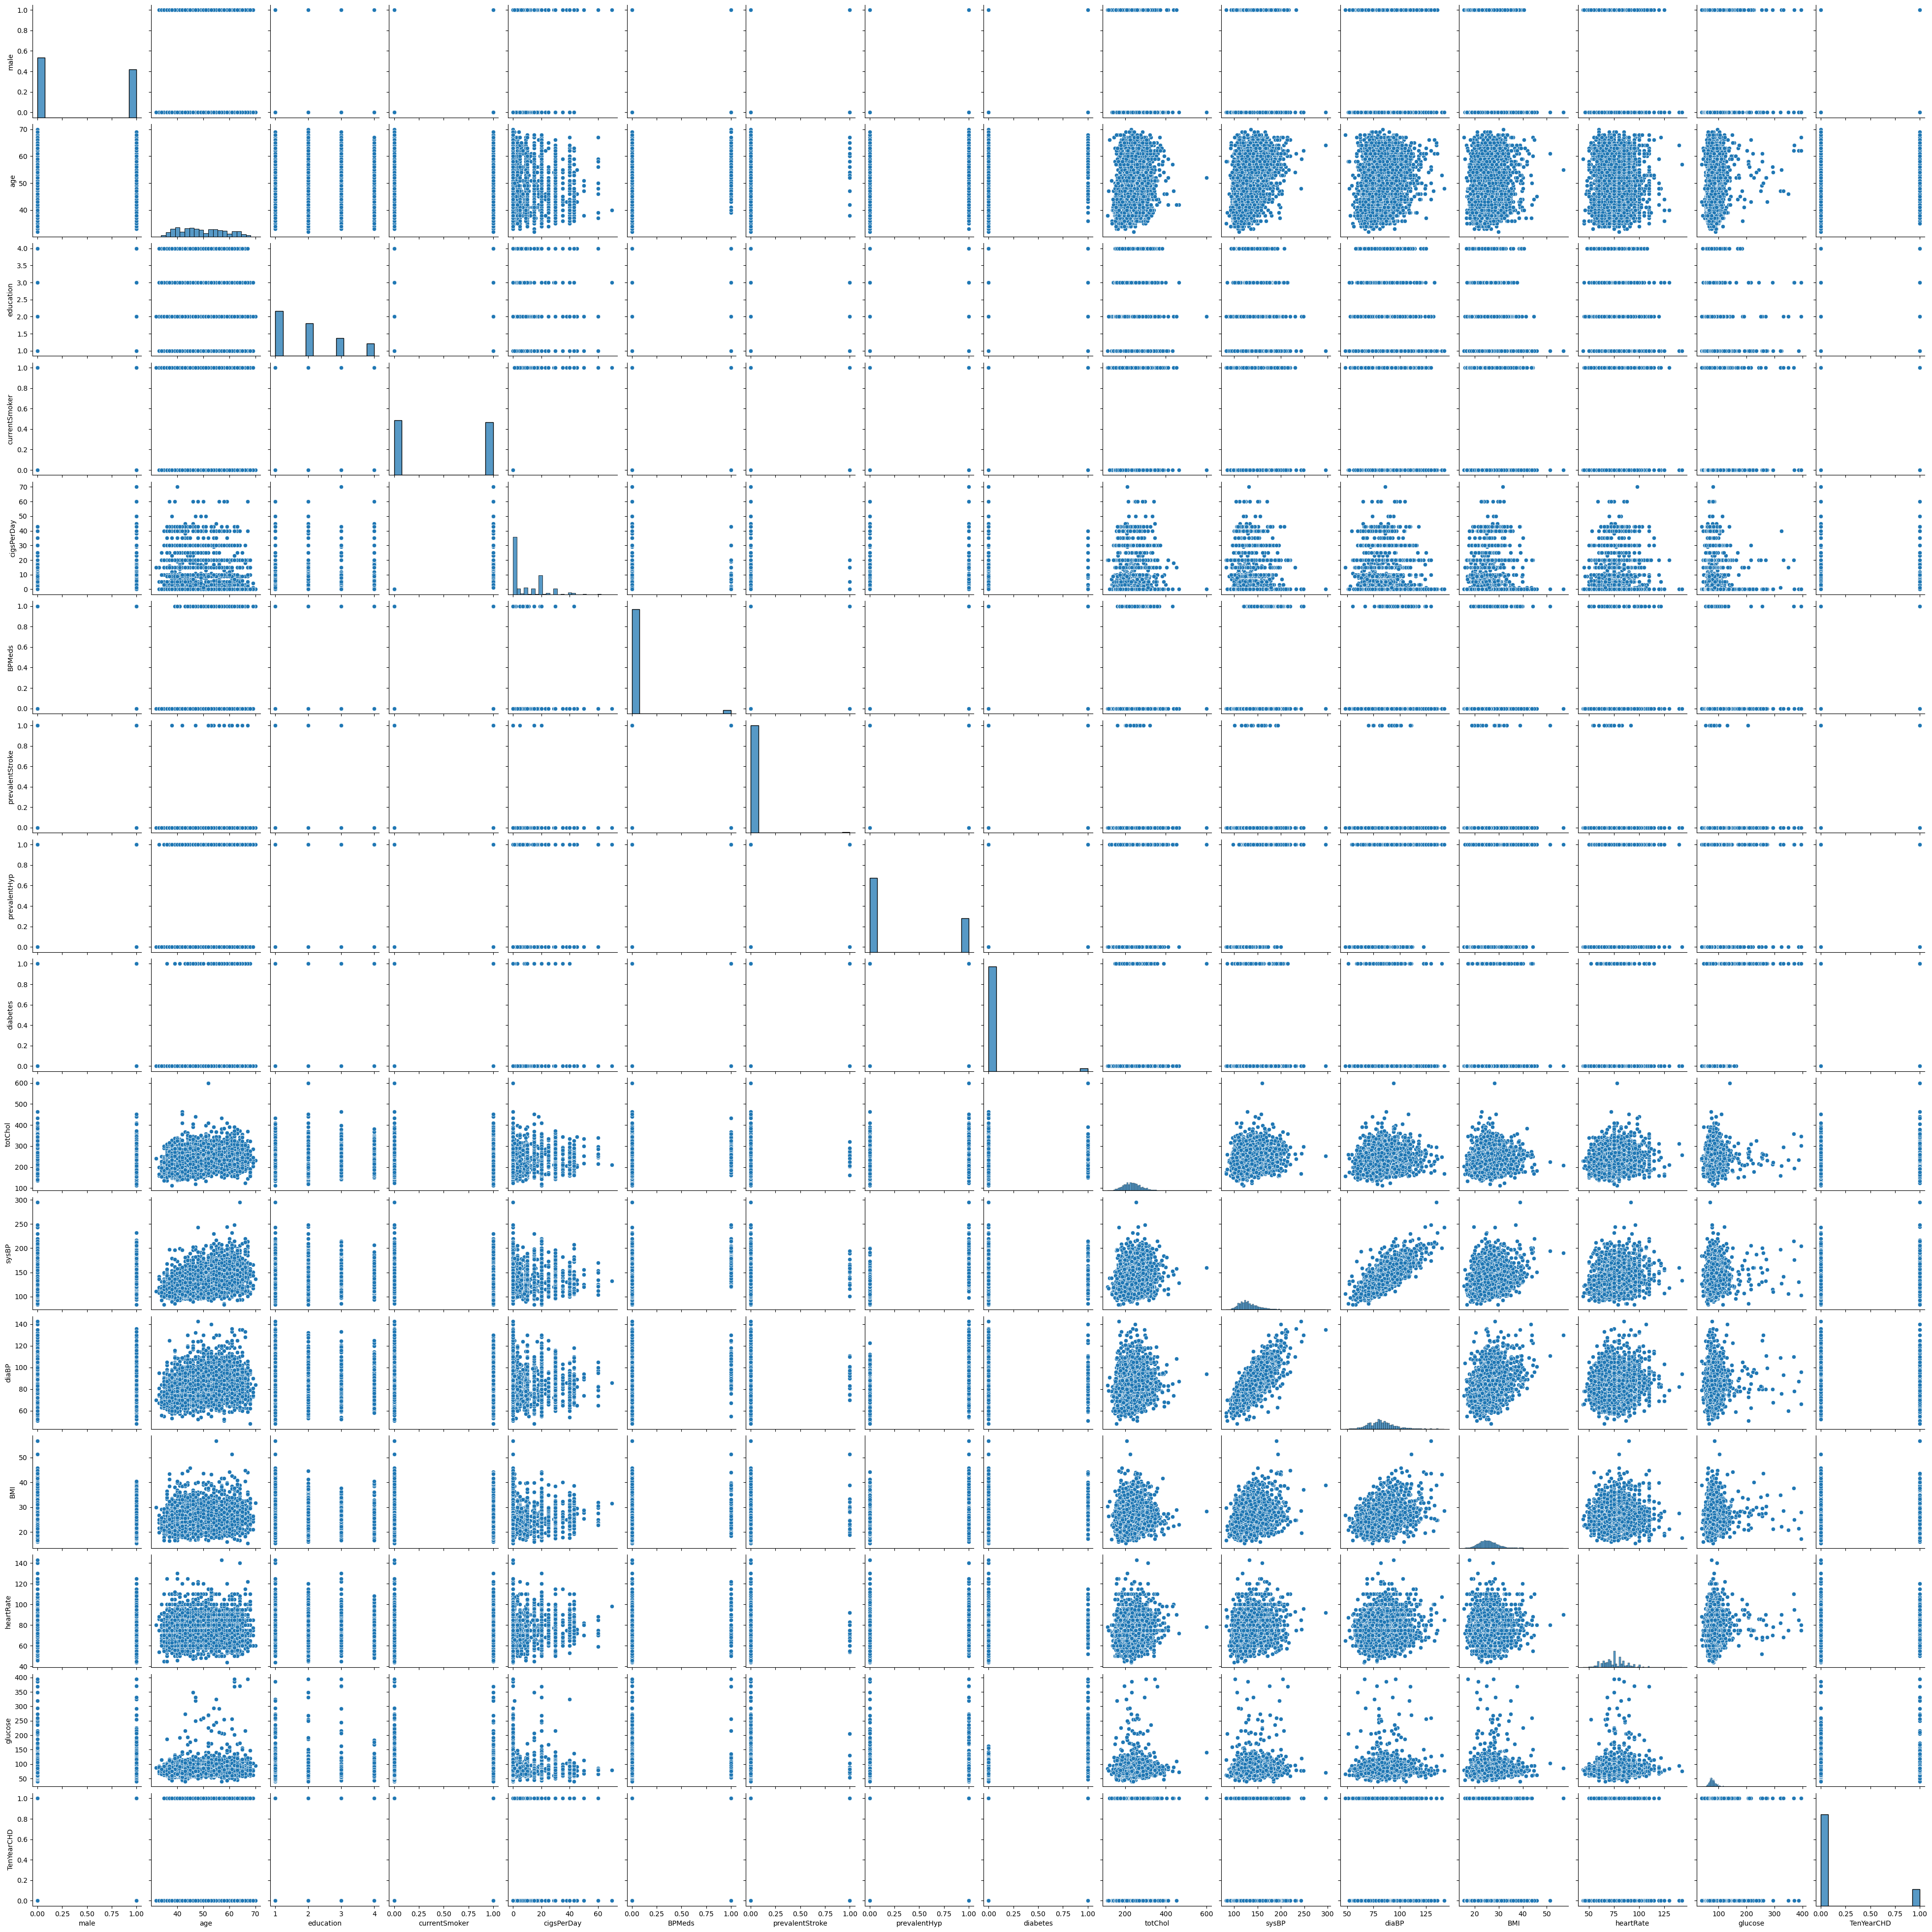

In [26]:
sns.pairplot(ds)
plt.show()

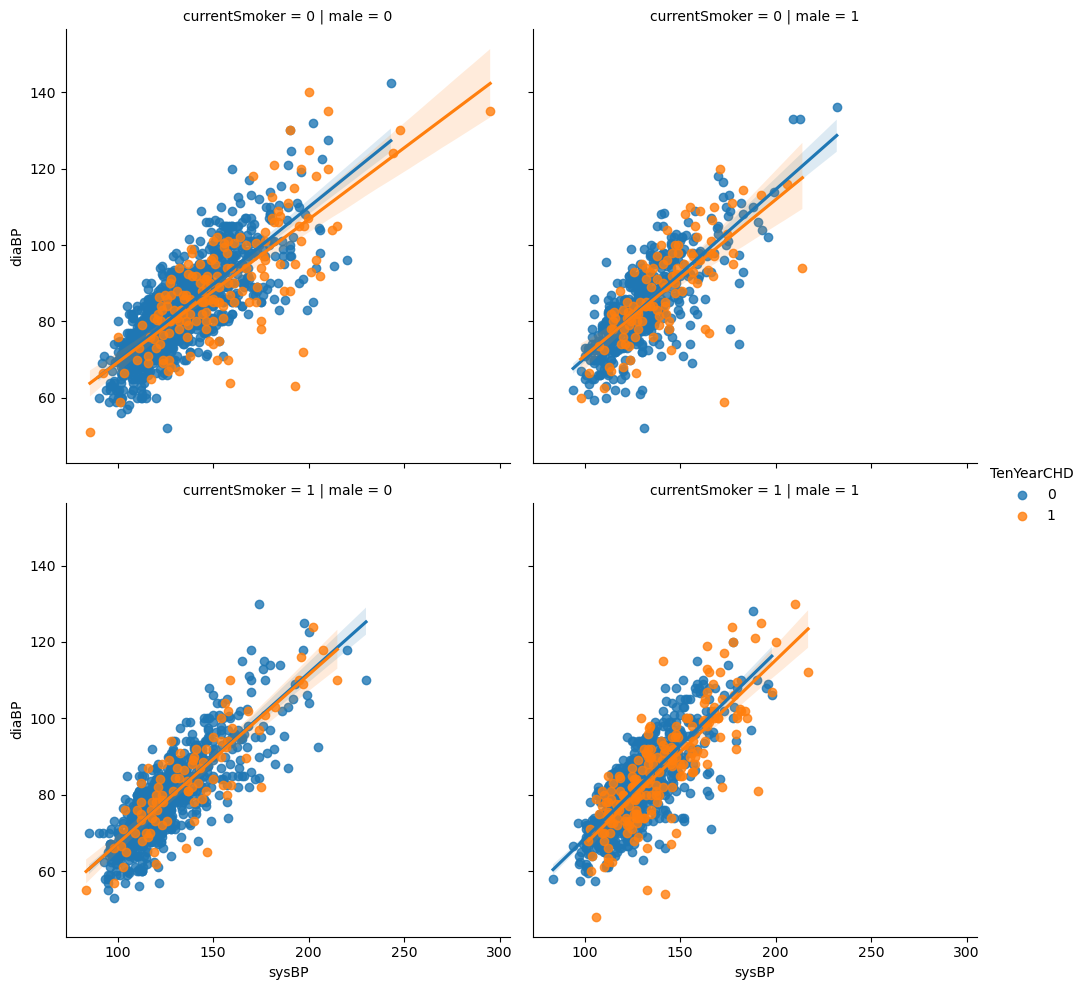

In [27]:
sns.lmplot('sysBP', 'diaBP', 
           data=ds,
           hue="TenYearCHD",
           col="male",row="currentSmoker")

Relationship between sysBP and diaBP based on gender & whether they are current smoker or not witht the plots that best fits the line.

# Feature Selection

In [28]:
cols = ds.columns[:-1]
cols

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [30]:
features=SelectKBest(score_func=chi2, k=10)


In [31]:
fit = features.fit(ds[cols], ds['TenYearCHD'])

In [32]:
scores=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(cols)

In [33]:
scores=pd.concat([columns,scores],axis=1)
scores.columns=['Feature','Score']

In [34]:
print(scores.nlargest(11,'Score'))


         Feature       Score
10         sysBP  669.506552
14       glucose  379.583137
1            age  295.507761
9        totChol  249.153078
4     cigsPerDay  156.567318
11         diaBP  142.878574
7   prevalentHyp   82.967184
8       diabetes   31.027987
5         BPMeds   28.153003
0           male   17.120430
12           BMI   15.730717


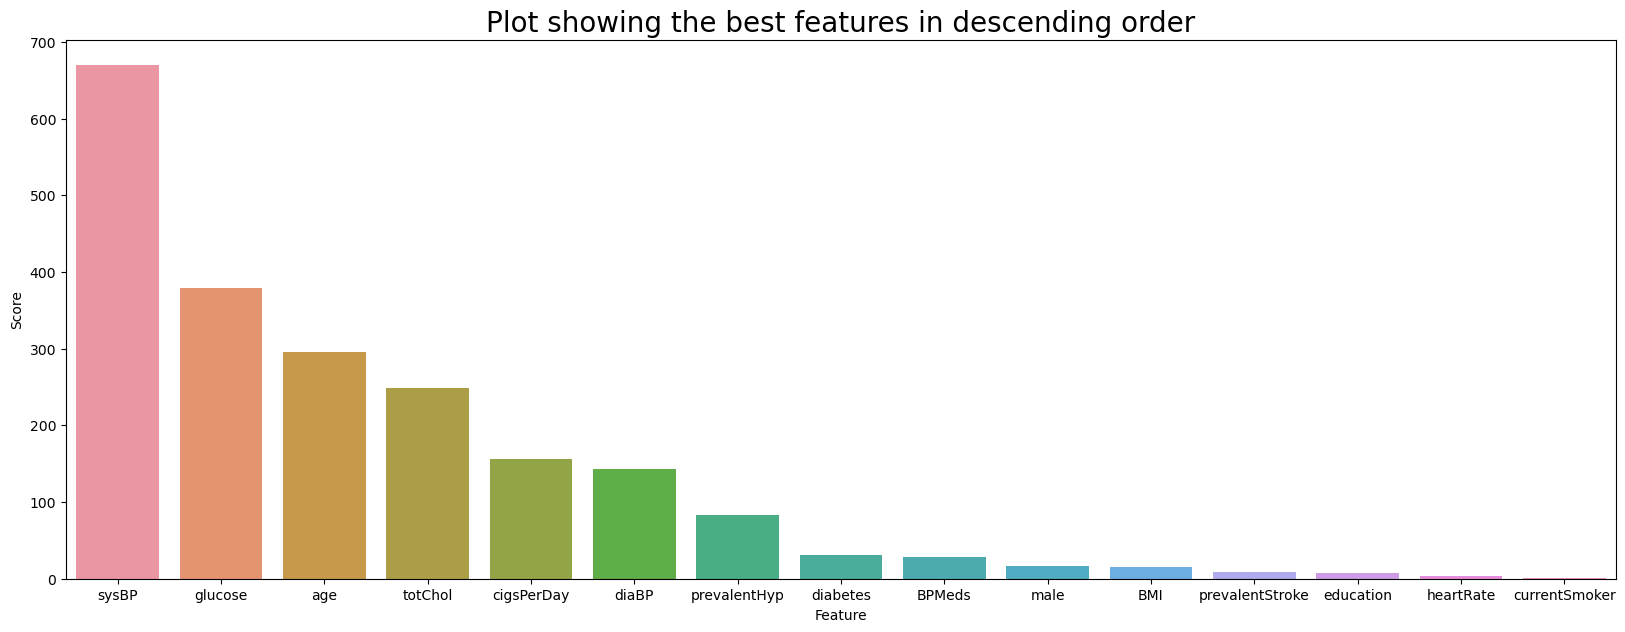

In [35]:
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores)
plt.title("Plot showing the best features in descending order", size=20)
plt.show()

In [36]:
features=scores["Feature"].tolist()[:10]
print('10 best features:', features)

10 best features: ['sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp', 'diabetes', 'BPMeds', 'male']


Best feature seems to systolic blood pressures followed by glucose and age

In [37]:
ds5=ds[['sysBP','glucose','age','cigsPerDay','totChol','diaBP','prevalentHyp','male','BPMeds','diabetes','TenYearCHD']]
ds5

,sysBP,glucose,age,cigsPerDay,totChol,diaBP,prevalentHyp,male,BPMeds,diabetes,TenYearCHD
0,106.0,77.0,39,0.0,195.0,70.0,0,1,0.0,0,0
1,121.0,76.0,46,0.0,250.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,20.0,245.0,80.0,0,1,0.0,0,0
3,150.0,103.0,61,30.0,225.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,23.0,285.0,84.0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4231,141.0,81.0,58,0.0,187.0,81.0,1,1,0.0,0,0
4232,168.0,79.0,68,0.0,176.0,97.0,1,1,0.0,0,1
4233,179.0,86.0,50,1.0,313.0,92.0,1,1,0.0,0,1
4234,126.5,68.0,51,43.0,207.0,80.0,0,1,0.0,0,0


In [38]:
cols2 = ds5.columns[:-1]
cols2

Index(['sysBP', 'glucose', 'age', 'cigsPerDay', 'totChol', 'diaBP',
       'prevalentHyp', 'male', 'BPMeds', 'diabetes'],
      dtype='object')

# Selecting the model:

Since this is a binary classification problem where the predicted value is either 0 or 1, Logistic regression is chosen as model.

In [39]:
import statsmodels.api as sm

In [40]:
model=sm.Logit(ds5.TenYearCHD,ds[cols])

In [41]:
r = model.fit()
r

Optimization terminated successfully.
         Current function value: 0.396642
         Iterations 6


In [42]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3641
Method:                           MLE   Df Model:                           14
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                 0.07059
Time:                        15:45:07   Log-Likelihood:                -1450.1
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 3.854e-39
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.4018      0.105      3.836      0.000       0.197       0.607
age                 0.0289      0.006      4.939      0.000       0.017       0.040
education          -0.1966      0.048     -4.087      0.000      -0.291      -0.102
currentSmoker      -0.2120      0.153     -1.386      0.166      -0.512       0.088
cigsPerDay          0.0206      0.006      3.327      0.001       0.008       0.033
BPMeds              0.3649      0.230      1.584      0.113      -0.087       0.816
prevalentStroke     0.7053      0.485      1.455      0.146      -0.245       1.655
prevalentHyp        0.9165      0.124      7.368      0.000       0.673       1.160
diabetes            0.7303      0.298      2.451      0.014       0.146       1.314
totChol            -0.0010      0.001     -0.934      0.351      -0.003       0.001
sysBP               0.0127      0.004      3.343      0.001       0.005       0.020
diaBP              -0.0259      0.006     -4.219      0.000      -0.038      -0.014
BMI                -0.0484      0.012     -3.932      0.000      -0.072      -0.024
heartRate          -0.0224      0.004     -5.645      0.000      -0.030      -0.015
glucose             0.0020      0.002      0.967      0.334      -0.002       0.006
===================================================================================
"""

In [43]:
def ds_elm(data, dv, cols):
    while len(cols) >0:
        model=sm.Logit(dv,data[cols])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            cols=cols.drop(largest_pvalue.index)

        

In [44]:
re= ds_elm(ds5, ds5.TenYearCHD, cols2)

In [45]:
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3647
Method:                           MLE   Df Model:                            8
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                 0.04316
Time:                        15:45:07   Log-Likelihood:                -1492.9
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 3.024e-25
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
sysBP            0.0099      0.004      2.674      0.007       0.003       0.017
age              0.0204      0.006      3.646      0.000       0.009       0.031
cigsPerDay       0.0089      0.004      2.218      0.027       0.001       0.017
totChol         -0.0038      0.001     -3.589      0.000      -0.006      -0.002
diaBP           -0.0470      0.006     -8.547      0.000      -0.058      -0.036
prevalentHyp     1.1978      0.117     10.207      0.000       0.968       1.428
male             0.4136      0.102      4.063      0.000       0.214       0.613
BPMeds           0.5538      0.225      2.466      0.014       0.114       0.994
diabetes         0.8311      0.228      3.652      0.000       0.385       1.277
================================================================================
"""

In [46]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

Splitting the data

In [47]:
dss=ds[['age','male','cigsPerDay','sysBP','diaBP','BMI','heartRate','diabetes','prevalentHyp', 'TenYearCHD']]

In [48]:
x = dss.iloc[:, :-1]
y = dss.iloc[:, -1]


Train model

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

In [50]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [51]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8497267759562842

Accuracy score

# Save model for deployment

In [ ]:
import pickle

In [53]:
model = 'model.sav'

pickle.dump(logreg, open(model, 'wb'))

In [54]:
l = pickle.load((open("model.sav","rb")))

In [55]:
s = l.predict(x_test)

# Accuracy score

In [56]:
sklearn.metrics.accuracy_score(y_test,s)

0.8497267759562842

Accuracy of model: 0.85

# Confusion matrix

<AxesSubplot:>

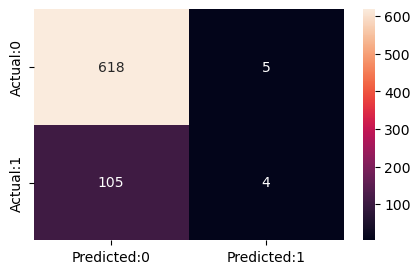

In [57]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test,s)
conf_matrix=pd.DataFrame(data=c,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,3))
sns.heatmap(conf_matrix, annot=True,fmt='d')

Classification report

In [58]:
print(classification_report(y_test, s))


              precision    recall  f1-score   support

           0       0.85      0.99      0.92       623
           1       0.44      0.04      0.07       109

    accuracy                           0.85       732
   macro avg       0.65      0.51      0.49       732
weighted avg       0.79      0.85      0.79       732

